In [27]:
import matplotlib.pyplot as plt
import numpy as np
def weighted_random_kaczmarz(A: np.ndarray, b: np.ndarray, x_init: np.ndarray=None, iterations: int=1000):
    """
    Weighted Randomized Kaczmarz Method.
    A: Coefficient matrix.
    b: Right-hand side vector.
    x_init: Initial guess for the solution.
    iterations: Number of iterations.
    """
    if x_init is None:
        x = np.zeros(A.shape[1])
    else:
        x = x_init

    # Compute the L2 norm of each row and their probabilities
    row_norms = np.linalg.norm(A, axis=1)**2
      # weights based on L2 norm squared / frobenius norm squared
    probabilities = row_norms / np.linalg.norm(A, ord='fro')**2
      # weights based on L2 norm
    #probabilities = row_norms / sum(row_norms)

    for _ in range(iterations):
        # Select a row based on the computed probabilities
        i = np.random.choice(a=len(b), replace=True ,p=probabilities)
        a_i = A[i]
        b_i = b[i]
        # Update the solution vector
        x += ((b_i - np.dot(a_i, x)) / np.linalg.norm(a_i)**2) * a_i

    return x

def standard_kaczmarz(A, b, iterations=1000):
    n = A.shape[1]
    x = np.zeros(n)
    count = 0
    while count < iterations:
        for i in range(len(b)):
            a_i = A[i]
            x += ((b[i] - np.dot(a_i, x)) / np.linalg.norm(a_i)**2) * a_i
            count+=1
    return x

# Create a synthetic linear system
#np.random.seed(42)  # For reproducibility
m, n = 100, 50
A = np.random.randn(m,n)
x_true = np.random.randn(n)
b = A.dot(x_true)

# Run both algorithms
# iterations = 40000
# x_standard = standard_kaczmarz(A, b, iterations=iterations)
# x_random = weighted_random_kaczmarz(A, b, iterations=iterations)

# Evaluate performance
def evaluate(x_pred, x_true):
    error = np.linalg.norm(x_pred - x_true)
    return error

# error_standard = evaluate(x_standard, x_true)
# error_random = evaluate(x_random, x_true)


#print(f'A: {A} \n b: {b}')
# print(f"Standard Kaczmarz Error: {error_standard}")
# print(f"Random Kaczmarz Error: {error_random}")
# print(f"L2 Norm of A: {np.linalg.norm(A, ord=2)**2}")

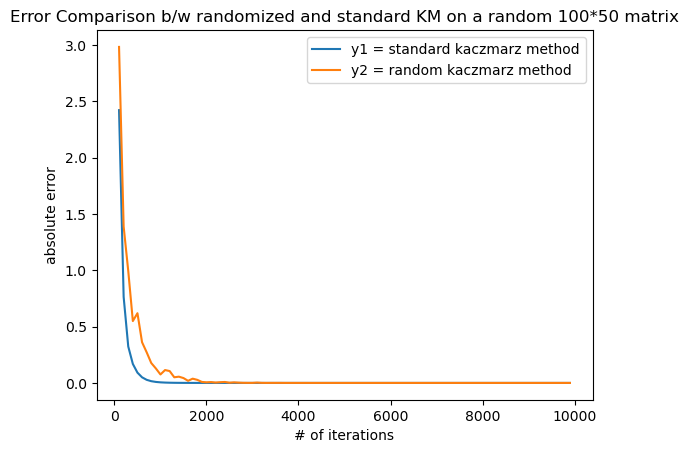

In [34]:
# plot the results
x_val = []
y_stand = []
y_rand = []

for i in range(100, 10000, 100):
    x_val.append(i)
    y1 = evaluate(standard_kaczmarz(A,b,iterations=i),x_true)
    y_stand.append(y1)
    y2 = evaluate(weighted_random_kaczmarz(A,b,iterations=i),x_true)
    y_rand.append(y2)

plt.plot(x_val, y_stand, label = "y1 = standard kaczmarz method")
plt.plot(x_val, y_rand, label = "y2 = random kaczmarz method")

plt.xlabel("# of iterations")
plt.ylabel("absolute error")
plt.title("Error Comparison b/w randomized and standard KM on a random 100*50 matrix")
plt.legend()